City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64
Linear Regression Equation: y = 1.63x + 82.06


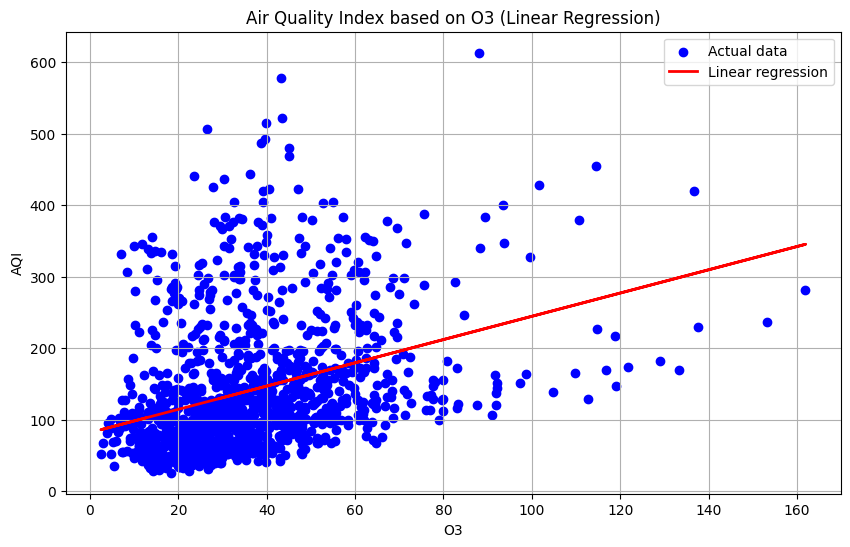

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load your dataset, replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('AQI.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values (remove or impute)
data.dropna(inplace=True)  # This will remove rows with missing values
# Or you can impute missing values using data.fillna() with appropriate strategy

# Ensure both columns contain numeric data
data['O3'] = pd.to_numeric(data['O3'], errors='coerce')
data['AQI'] = pd.to_numeric(data['AQI'], errors='coerce')

# Split the data into features (X) and target variable (y)
X = data[['O3']]
y = data['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Get the linear regression equation and coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Print the linear regression equation and coefficients
print("Linear Regression Equation: y = {:.2f}x + {:.2f}".format(slope, intercept))

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Linear regression')
plt.title('Air Quality Index based on O3 (Linear Regression)')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 7489.096670563356


City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64


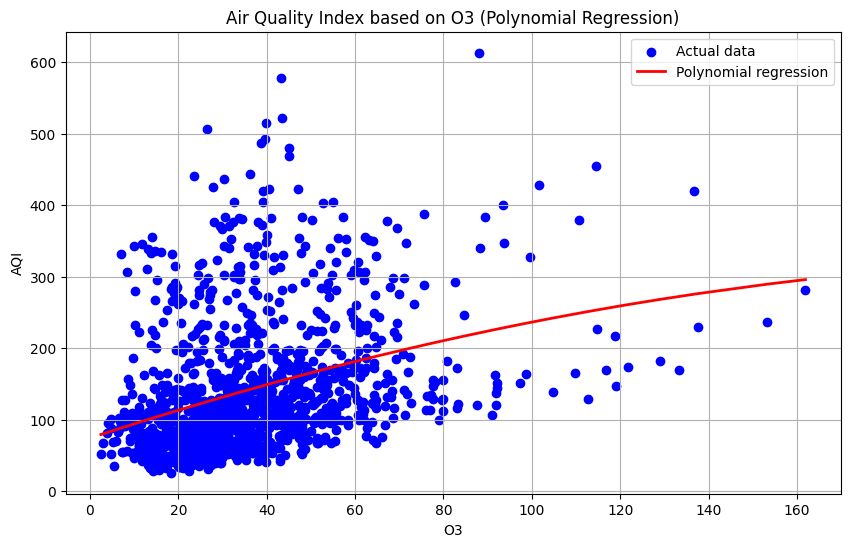

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load your dataset, replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('AQI.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values (remove or impute)
data.dropna(inplace=True)  # This will remove rows with missing values
# Or you can impute missing values using data.fillna() with appropriate strategy

# Ensure both columns contain numeric data
data['O3'] = pd.to_numeric(data['O3'], errors='coerce')
data['AQI'] = pd.to_numeric(data['AQI'], errors='coerce')

# Split the data into features (X) and target variable (y)
X = data[['O3']]
y = data['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform features into polynomial features
degree = 2  # Change the degree of the polynomial as needed
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = model.predict(X_test_poly)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
# Sort X_test for better visualization
sort_axis = np.argsort(X_test.values.flatten())
plt.plot(X_test.values.flatten()[sort_axis], y_pred[sort_axis], color='red', linewidth=2, label='Polynomial regression')
plt.title('Air Quality Index based on O3 (Polynomial Regression)')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64
Mean Squared Error: 8664.90564102564


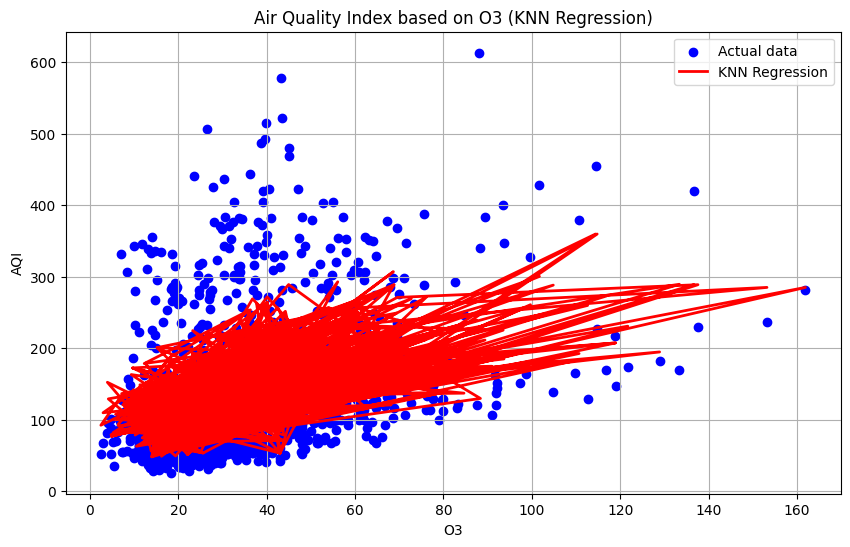

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset, replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('AQI.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values (remove or impute)
data.dropna(inplace=True)  # This will remove rows with missing values
# Or you can impute missing values using data.fillna() with appropriate strategy

# Ensure both columns contain numeric data
data['O3'] = pd.to_numeric(data['O3'], errors='coerce')
data['AQI'] = pd.to_numeric(data['AQI'], errors='coerce')

# Split the data into features (X) and target variable (y)
X = data[['O3']]
y = data['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN regressor with the desired number of neighbors
k = 5  # Number of neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=k)

# Train the KNN regressor
knn_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='KNN Regression')
plt.title('Air Quality Index based on O3 (KNN Regression)')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()


City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64
Mean Squared Error: 12836.559843805646


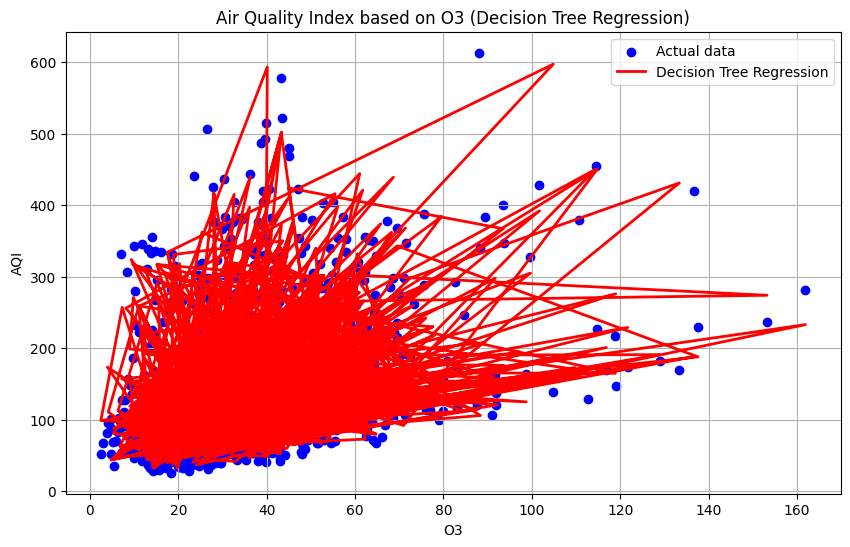

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Load your dataset, replace 'your_dataset.csv' with the actual path to your dataset
data = pd.read_csv('AQI.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values (remove or impute)
data.dropna(inplace=True)  # This will remove rows with missing values
# Or you can impute missing values using data.fillna() with appropriate strategy

# Ensure both columns contain numeric data
data['O3'] = pd.to_numeric(data['O3'], errors='coerce')
data['AQI'] = pd.to_numeric(data['AQI'], errors='coerce')

# Split the data into features (X) and target variable (y)
X = data[['O3']]
y = data['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree regressor
decision_tree_regressor = DecisionTreeRegressor()

# Train the Decision Tree regressor
decision_tree_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = decision_tree_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Decision Tree Regression')
plt.title('Air Quality Index based on O3 (Decision Tree Regression)')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
dtype: int64
Mean Squared Error: 8118.49094426366


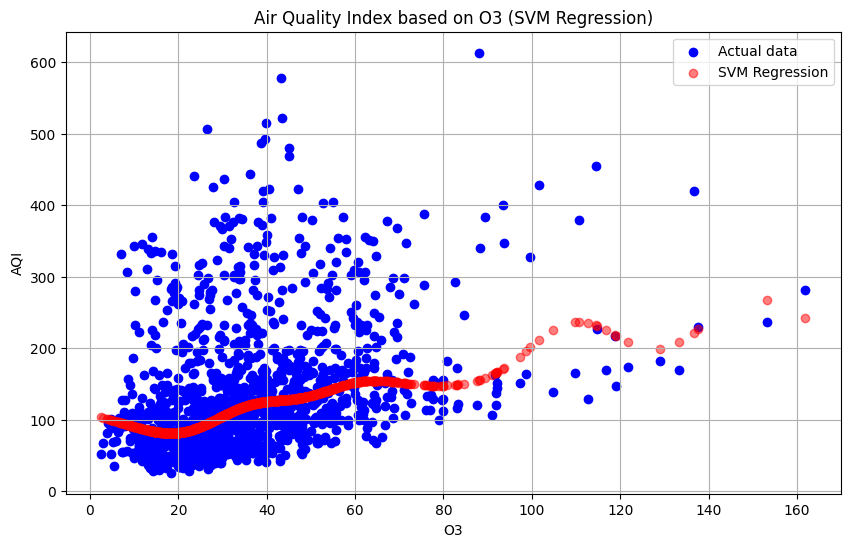

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load your dataset
data = pd.read_csv('AQI.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values (remove or impute)
data.dropna(inplace=True)  # This will remove rows with missing values

# Ensure both columns contain numeric data
data['O3'] = pd.to_numeric(data['O3'], errors='coerce')
data['AQI'] = pd.to_numeric(data['AQI'], errors='coerce')

# Drop rows with NaN values that might have been introduced by coercion
data.dropna(inplace=True)

# Split the data into features (X) and target variable (y)
X = data[['O3']]
y = data['AQI']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for SVM
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Initialize the Support Vector Regressor
svr_regressor = SVR(kernel='rbf')

# Train the Support Vector Regressor
svr_regressor.fit(X_train_scaled, y_train_scaled)

# Predict on the testing set
y_pred_scaled = svr_regressor.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_test['O3'], y_test, color='blue', label='Actual data')
plt.scatter(X_test['O3'], y_pred, color='red', label='SVM Regression', alpha=0.5)
plt.title('Air Quality Index based on O3 (SVM Regression)')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error for Random Forest: 10234.029236235334


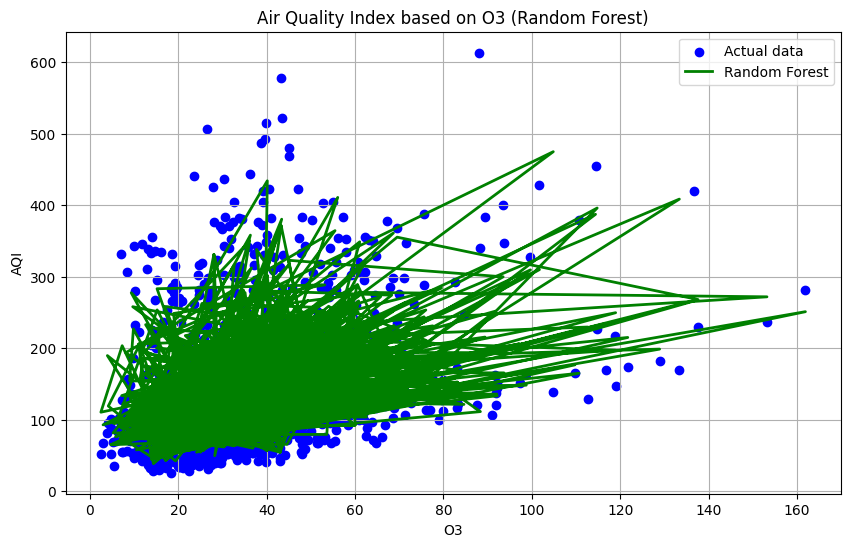

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error for Random Forest:", mse_rf)

# Plotting for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred_rf, color='green', linewidth=2, label='Random Forest')
plt.title('Air Quality Index based on O3 (Random Forest)')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()

Mean Squared Error for AdaBoost: 9279.234926184472


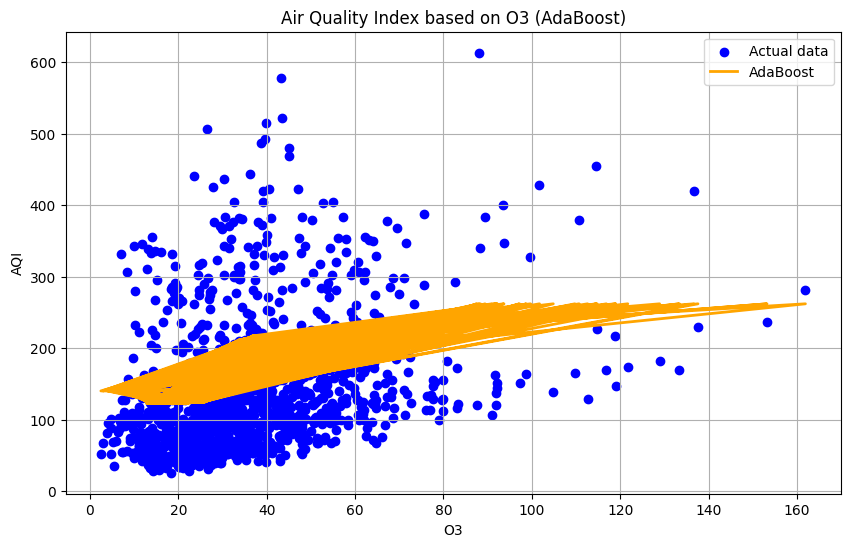

In [16]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

# Train the AdaBoost model
ab_model = AdaBoostRegressor(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_ab = ab_model.predict(X_test)

# Calculate Mean Squared Error
mse_ab = mean_squared_error(y_test, y_pred_ab)
print("Mean Squared Error for AdaBoost:", mse_ab)

# Plotting for AdaBoost
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred_ab, color='orange', linewidth=2, label='AdaBoost')
plt.title('Air Quality Index based on O3 (AdaBoost)')
plt.xlabel('O3')
plt.ylabel('AQI')
plt.legend()
plt.grid(True)
plt.show()